In [1]:
%load_ext Cython

# Feature Engineering for NLP in Python

In [3]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import cython

# Ce notebook s'appuit sur un cours en Anglais de Datacamp . Vous pouvez utiliser un traducteur.
Voici le lien pour accéder aux vidéos et aux slides :
https://www.dropbox.com/sh/jinhd7xyjq8gmxi/AAAXcjnfKGIB5gRBE3iI_3JPa?dl=0

Programme

Chapitre 1 - Basic features and readability scores

    Learn to compute basic features such as number of words, number of characters, average word length and number of special characters
    (such as Twitter hashtags and mentions). 
    You will also learn to compute readability scores and determine the amount of education required to comprehend a piece of text.


Chapitre 2 - Text preprocessing, POS tagging and NER
   
    In this chapter, you will learn about tokenization and lemmatization. You will then learn how to perform text cleaning, part-of-speech tagging, and named entity recognition using the spaCy library. Upon mastering these concepts,
    you will proceed to make the Gettysburg address machine-friendly, analyze noun usage in fake news, and identify people mentioned in a TechCrunch article.


Chapitre 3 - N-Gram models

    Learn about n-gram modeling and use it to perform sentiment analysis on movie reviews.


Chapitre 4 -TF-IDF and similarity scores

    Learn how to compute tf-idf weights and the cosine similarity score between two vectors. You will use these concepts to build a movie and a TED Talk recommender. Finally, you will also learn about word embeddings and using word vector representations, you will compute similarities between various Pink Floyd songs.


# Chapitre 1 - Basic features and readability scores

Voir la première vidéo du chapitre 1

In [4]:
import pandas as pd

df1 = pd.read_csv( "df1.csv", sep =';').dropna(axis=1)


In [5]:
df1

,feature 1,feature 2,feature 3,feature 4 feature 5,label
0,29.0000,0,0,211.3375,female
1,0.9167,1,2,151.5500,male
2,2.0000,1,2,151.5500,female
3,30.0000,1,2,151.5500,male
4,25.0000,1,2,151.5500,female
5,48.0000,0,0,26.5500,male
6,63.0000,1,0,77.9583,female
7,39.0000,0,0,0.0000,male
8,53.0000,2,0,51.4792,female
9,71.0000,0,0,49.5042,male


In [6]:
#afficher les caractéristique de df1 (ie les colonnes)

df1.columns

Index(['feature 1', 'feature 2', 'feature 3', 'feature 4 feature 5', 'label'], dtype='object')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   feature 1            15 non-null     float64
 1   feature 2            15 non-null     int64  
 2   feature 3            15 non-null     int64  
 3   feature 4 feature 5  15 non-null     float64
 4   label                15 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 728.0+ bytes


df1 contient des caractéristiques catégorielles et n'est donc pas adapté à l'application d'algorithmes de ML.

Dans cet exercice, votre tâche consiste à convertir df1 dans un format adapté.

In [8]:
#utiliser pd.get_dummies() pour modifier les caractéristiques catégorielles

df1 = pd.get_dummies(df1, dtype=int, drop_first=True)

#afficher le nouveau dataframe

In [9]:
df1.head()

,feature 1,feature 2,feature 3,feature 4 feature 5,label_male
0,29.0000,0,0,211.3375,0
1,0.9167,1,2,151.5500,1
2,2.0000,1,2,151.5500,0
3,30.0000,1,2,151.5500,1
4,25.0000,1,2,151.5500,0


Voir la 2eme vidéo du chapitre 1

In [10]:
# importer le csv russian_tweets

posts = pd.read_csv( "russian_tweets.csv", sep =',')

In [11]:
posts

,Unnamed: 0,content
0,127447,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...
1,123642,Muslim Attacks NYPD Cops with Meat Cleaver. Me...
2,226970,.@vfpatlas well that's a swella word there (di...
3,138339,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...
4,161610,Жители обстреливаемых районов Донецка проводят...
...,...,...
995,24329,How To Inspire People With Your Music! https:/...
996,315060,... https://t.co/AfWdTkKQlm
997,361901,Trevor Noah: Until we start treating racism li...
998,119948,SenSanders: RT SenJeffMerkley: We must act bol...



Dans cet exercice, vous avez un dataframe qui contient des tweets associés à l'Agence russe de recherche Internet.

Votre tâche est de créer une nouvelle feature «char_count» qui calcule le nombre de caractères pour chaque tweet. Calculez également la longueur moyenne de chaque tweet. 

In [12]:
# Créer une nouvelle feature  char_count
posts["char_count"] = posts["content"].apply(len)

# Printer la longueur moyenne des tweets
print("Mean Xs post length is :", posts["char_count"].apply("mean"))

Mean Xs post length is : 103.462


In [13]:
# importer le csv ted
ted = pd.read_csv( "ted.csv", sep =',')

ted.head()

,transcript,url
0,"We're going to talk — my — a new lecture, just...",https://www.ted.com/talks/al_seckel_says_our_b...
1,"This is a representation of your brain, and yo...",https://www.ted.com/talks/aaron_o_connell_maki...
2,It's a great honor today to share with you The...,https://www.ted.com/talks/carter_emmart_demos_...
3,"My passions are music, technology and making t...",https://www.ted.com/talks/jared_ficklin_new_wa...
4,It used to be that if you wanted to get a comp...,https://www.ted.com/talks/jeremy_howard_the_wo...



ted est un dataframe qui contient les transcriptions de 500 conférences TED. Votre travail consiste à calculer une nouvelle fonctionnalité word_count qui contient le nombre approximatif de mots pour chaque discours. Par conséquent, vous devez également calculer le nombre moyen de mots des exposés. Les transcriptions sont disponibles dans la colonne transcript.

Vous devrez définir une fonction count_words qui prend une chaîne de charactères comme argument et renvoie le nombre de mots de la chaîne. Vous devrez ensuite appliquer cette fonction à la colonne de transcript de ted pour créer pour créer une nouvelle feature (caractéristique). 

Il faut ensuite printer le  nombre moyen de mots de toutes les transcriptions

In [14]:
# définisser la fonction count_words

def count_words(string):
	# Split the string into words
    words = string.split()
    
    # Return the number of words
    return len(words)

# créer une nouvelle colonne contenant le nombre de mots de chaque transcription
ted["count_words"] = ted["transcript"].apply(count_words)

# Calculer le nombre moyen de mots
print("Mean ted words quantity is :",ted["count_words"].apply("mean"))

Mean ted words quantity is : 1987.1


Revenons aux tweets russes. Dans cet exercice, vous calculerez le nombre de hashtags et de mentions @ dans chaque tweet en définissant respectivement deux fonctions count_hashtags () et count_mentions () et en les appliquant à la fonction de contenu des tweets.



Text(0.5, 1.0, 'Distribution of hashtags quantity')

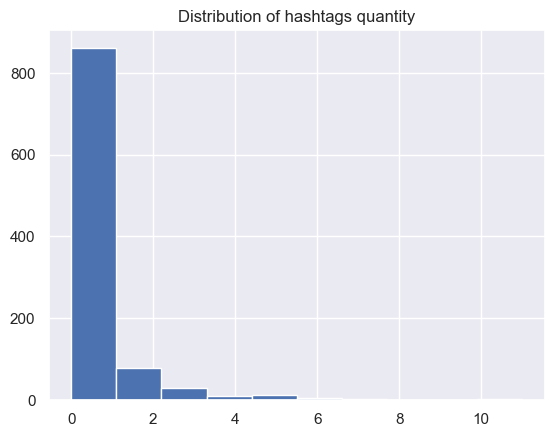

In [15]:
# Définisser la fonction qui compte les hashtags. 
#utilisez startswith () pour vérifier si un mot particulier commence par '#'.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def count_hashtags(string):
	# Split string en  words
    words = string.split()
    
    # créer une liste qui contient les mots avec #
    hashtags = [word for word in words if word.startswith("#")]
    
    # Retoruner le nombre hashtags
    return len(hashtags)

# Créer une nouvelle feature contenant le nombre de hashtags dans 'content'
posts["count_#"] = posts["content"].apply(count_hashtags)

#afficher un histogramme des du nombre de hashtags
posts["count_#"].hist(bins=10)
plt.title("Distribution of hashtags quantity")

Text(0.5, 1.0, 'Distribution of mentions quantity')

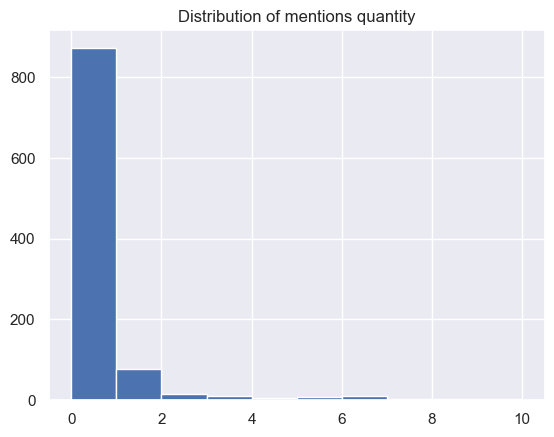

In [16]:
# définisser une fonction qui compte le nombre de mentions @mention
#utilisez startswith () pour vérifier si un mot particulier commence par '@'.

def count_mentions(string):
	# Split string en  words
    words = string.split()
    
     # créer une liste qui contient les mots avec @
    ats = [word for word in words if word.startswith("@")]
    
    # Retoruner le nombre de mentions
    return len(ats)

#afficher un histogramme des du nombre de hashtags
posts["count_@"] = posts["content"].apply(count_mentions)
posts["count_@"].hist(bins=10)
plt.title("Distribution of mentions quantity")

# Chapitre 2 - Text preprocessing, POS tagging and NER 

Voir vidéo 1 du chapitre 2


Identifiez la liste des mots parmi les choix qui n'ont pas le même lemma

1 He, She, I, They 

2 Am, Are, Is, Was

3 Increase, Increases, Increasing, Increased

4 Car, Bike, Truck, Bus




Dans cet exercice, vous "tokeniserer" l'un des discours les plus célèbres de tous les temps: le discours de Gettysburg prononcé par le président américain Abraham Lincoln pendant la guerre civile américaine.

Le discours entier est disponible sous la forme d'une chaîne nommée gettysburg.

In [17]:
gettysburg = "Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal. Now we're engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We're met on a great battlefield of that war. We've come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It's altogether fitting and proper that we should do this. But, in a larger sense, we can't dedicate - we can not consecrate - we can not hallow - this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It's rather for us to be here dedicated to the great task remaining before us - that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion - that we here highly resolve that these dead shall not have died in vain - that this nation, under God, shall have a new birth of freedom - and that government of the people, by the people, for the people, shall not perish from the earth."

In [18]:
import spacy
!python -m spacy download en

# charger 'en_core_web_sm'
nlp = spacy.load("en_core_web_sm")

# Créer un Doc object
doc = nlp(gettysburg)

# Generer les tokens et les printer
tokens = [token.text for token in doc]

print(tokens)

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 445.2 kB/s eta 0:00:29
     - -------------------------------------- 0.5/12.8 MB 5.0 MB/s eta 0:00:03
     ----- ---------------------------------- 1.8/12.8 MB 12.7 MB/s eta 0:00:01
     ----------- ---------------------------- 3.7/12.8 MB 19.9 MB/s eta 0:00:01
     -------------------- ------------------- 6.5/12.8 MB 27.9 MB/s eta 0:00:01
     -------------------------------- ------ 10.7/12.8 MB 54.4 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 65.1 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
['Four', 'score', 'and', 'seven', 'years', 'ago', 'our', 'fathers', 'brought', 'forth', 'on', 'this', 'continent', ',', 'a', 'new', 'nation'

In [19]:
# import spacy
# !python -m spacy download en
# # charger 'en_core_web_sm'
# nlp = spacy.load("en_core_web_sm")

# # Créer un Doc objectd
# doc = nlp(gettysburg)

# Generer les lemmas
lemmas = [token.lemma_ for token in doc]

print(lemmas)



['four', 'score', 'and', 'seven', 'year', 'ago', 'our', 'father', 'bring', 'forth', 'on', 'this', 'continent', ',', 'a', 'new', 'nation', ',', 'conceive', 'in', 'Liberty', ',', 'and', 'dedicate', 'to', 'the', 'proposition', 'that', 'all', 'man', 'be', 'create', 'equal', '.', 'now', 'we', 'be', 'engage', 'in', 'a', 'great', 'civil', 'war', ',', 'test', 'whether', 'that', 'nation', ',', 'or', 'any', 'nation', 'so', 'conceive', 'and', 'so', 'dedicated', ',', 'can', 'long', 'endure', '.', 'we', 'be', 'meet', 'on', 'a', 'great', 'battlefield', 'of', 'that', 'war', '.', 'we', "'ve", 'come', 'to', 'dedicate', 'a', 'portion', 'of', 'that', 'field', ',', 'as', 'a', 'final', 'resting', 'place', 'for', 'those', 'who', 'here', 'give', 'their', 'life', 'that', 'that', 'nation', 'might', 'live', '.', 'it', 'be', 'altogether', 'fitting', 'and', 'proper', 'that', 'we', 'should', 'do', 'this', '.', 'but', ',', 'in', 'a', 'large', 'sense', ',', 'we', 'can', 'not', 'dedicate', '-', 'we', 'can', 'not', 'c

In [20]:
# convertir lemmas en string (utiliser .join() ) et les printer
print(" ".join(lemmas))

four score and seven year ago our father bring forth on this continent , a new nation , conceive in Liberty , and dedicate to the proposition that all man be create equal . now we be engage in a great civil war , test whether that nation , or any nation so conceive and so dedicated , can long endure . we be meet on a great battlefield of that war . we 've come to dedicate a portion of that field , as a final resting place for those who here give their life that that nation might live . it be altogether fitting and proper that we should do this . but , in a large sense , we can not dedicate - we can not consecrate - we can not hallow - this ground . the brave man , living and dead , who struggle here , have consecrate it , far above our poor power to add or detract . the world will little note , nor long remember what we say here , but it can never forget what they do here . it be for we the living , rather , to be dedicate here to the unfinished work which they who fight here have thus

Voir la 2eme vidéo du chapitre 2

Dans cet exercice, on va traiter l'extrait d'un article de blog. Votre tâche consiste à préparer ce texte dans un format plus convivial pour la machine. Cela impliquera la conversion en minuscules, la lemmatisation et la suppression des mots vides, des ponctuations et des caractères non alphabétiques.

L'extrait est disponible dans blog 

In [21]:
blog = '\nTwenty-first-century politics has witnessed an alarming rise of populism in the U.S. and Europe. The first warning signs came with the UK Brexit Referendum vote in 2016 swinging in the way of Leave. This was followed by a stupendous victory by billionaire Donald Trump to become the 45th President of the United States in November 2016. Since then, Europe has seen a steady rise in populist and far-right parties that have capitalized on Europe’s Immigration Crisis to raise nationalist and anti-Europe sentiments. Some instances include Alternative for Germany (AfD) winning 12.6% of all seats and entering the Bundestag, thus upsetting Germany’s political order for the first time since the Second World War, the success of the Five Star Movement in Italy and the surge in popularity of neo-nazism and neo-fascism in countries such as Hungary, Czech Republic, Poland and Austria.\n'

In [22]:
# Charger le modèle et créer un  object doc
nlp = spacy.load("en_core_web_sm")

doc = nlp(blog)
# obetnir une liste de stopwords
stopwords = spacy.lang.en.stop_words.STOP_WORDS

# Generer des tokens lemmatizés
lemmas = [token.lemma_ for token in doc]

# Enlever les stopwords et les termes non alphabétiques (utiliser .isalpha()) tokens

a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() and lemma not in stopwords]

# convertir lemmas en string et les printer
print(" ".join(a_lemmas))

century politic witness alarming rise populism Europe warning sign come UK Brexit Referendum vote swinge way Leave follow stupendous victory billionaire Donald Trump President United States November Europe steady rise populist far right party capitalize Europe Immigration Crisis raise nationalist anti europe sentiment instance include Alternative Germany AfD win seat enter Bundestag upset Germany political order time Second World War success Five Star Movement Italy surge popularity neo nazism neo fascism country Hungary Czech Republic Poland Austria


In [23]:
ted["transcript"]

0      We're going to talk — my — a new lecture, just...
1      This is a representation of your brain, and yo...
2      It's a great honor today to share with you The...
3      My passions are music, technology and making t...
4      It used to be that if you wanted to get a comp...
                             ...                        
495    Today I'm going to unpack for you three exampl...
496    Both myself and my brother belong to the under...
497    John Hockenberry: It's great to be here with y...
498    What you're doing, right now, at this very mom...
499    We've got a real problem with math education r...
Name: transcript, Length: 500, dtype: object

In [25]:
dir(cython)

['ArrayType',
 'CythonCImports',
 'CythonDotImportedFromElsewhere',
 'CythonDotParallel',
 'CythonMetaType',
 'CythonType',
 'CythonTypeObject',
 'NULL',
 'PointerType',
 'Py_UCS4',
 'Py_UNICODE',
 'Py_hash_t',
 'Py_ssize_t',
 'Py_tss_t',
 'StructType',
 'UnionType',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 'absolute_import',
 'address',
 'always_allows_keywords',
 'annotation_typing',
 'array',
 'basestring',
 'binding',
 'bint',
 'boundscheck',
 'cast',
 'ccall',
 'cclass',
 'cdiv',
 'cdivision',
 'cdivision_warnings',
 'cfunc',
 'char',
 'cmod',
 'compile',
 'compiled',
 'complex',
 'complex_types',
 'dataclasses',
 'declare',
 'double',
 'doublecomplex',
 'embedsignature',
 'exceptval',
 'final',
 'float',
 'float_types',
 'floatcomplex',
 'floating',
 'freelist',
 'fused_type',
 'gil',
 'gs',
 'i',
 'index_type',
 'infer_types',
 'initializedcheck',
 'inline',
 'int',
 'int_types',
 'integral

In [26]:
# Définisser une fonction pour traiter le texte
stopwords = spacy.lang.en.stop_words.STOP_WORDS


@cython.locals(text=str, doc=str, lemmas=str, a_lemmas=str)
@cython.returns(str)
@cython.cfunc
def preprocess(text):
    # créer 1 Doc object
    doc = nlp(text)
    
    # Générer les lemmas
    lemmas = [token.lemma_ for token in doc]
    # Enlever les  stopwords and non-alphabetiques éléments
    a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() and lemma not in stopwords]
    
    return a_lemmas
  

In [27]:
# appliquer ce preprocess à ted['transcript']
%timeit ted['transcript_preprocessed'] = ted['transcript'].apply(preprocess)
ted['transcript_preprocessed']

2min 9s ± 1.77 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


0      [talk, new, lecture, TED, I, illusion, create,...
1      [representation, brain, brain, break, left, ha...
2      [great, honor, today, share, Digital, Universe...
3      [passion, music, technology, thing, combinatio...
4      [use, want, computer, new, program, programmin...
                             ...                        
495    [today, I, unpack, example, iconic, design, pe...
496    [brother, belong, demographic, Pat, percent, a...
497    [John, Hockenberry, great, Tom, I, want, start...
498    [right, moment, kill, More, car, internet, lit...
499    [real, problem, math, education, right, basica...
Name: transcript_preprocessed, Length: 500, dtype: object

In [24]:
ted.head(5)

,transcript,url,count_words,transcript_preprocessed
0,"We're going to talk — my — a new lecture, just...",https://www.ted.com/talks/al_seckel_says_our_b...,1704,"[talk, new, lecture, TED, I, illusion, create,..."
1,"This is a representation of your brain, and yo...",https://www.ted.com/talks/aaron_o_connell_maki...,1387,"[representation, brain, brain, break, left, ha..."
2,It's a great honor today to share with you The...,https://www.ted.com/talks/carter_emmart_demos_...,890,"[great, honor, today, share, Digital, Universe..."
3,"My passions are music, technology and making t...",https://www.ted.com/talks/jared_ficklin_new_wa...,1548,"[passion, music, technology, thing, combinatio..."
4,It used to be that if you wanted to get a comp...,https://www.ted.com/talks/jeremy_howard_the_wo...,3480,"[use, want, computer, new, program, programmin..."


In [25]:
import sys
sys.version

'3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:24:38) [MSC v.1916 64 bit (AMD64)]'

Comparer ted['transcript_preprocessed'] et ted['transcript']

Voir vidéo 3 du chapitre 2

Dans cet exercice, vous effectuerez un "part-of-speech tagging" d'une partie du discours sur un passage célèbre de l'un des romans les plus connus de tous les temps, Lord of the Flies, écrit par William Golding.

Le passage est disponible dans lotf

In [29]:
lotf = 'He found himself understanding the wearisomeness of this life, where every path was an improvisation and a considerable part of one’s waking life was spent watching one’s feet.'

In [30]:
# charger  en_core_web_sm model


# créer un Doc object
doc = nlp(lotf)

# Générer tokens et pos tags
pos = [(token.text, token.pos) for token in doc]
print(pos)

[('He', 95), ('found', 100), ('himself', 95), ('understanding', 100), ('the', 90), ('wearisomeness', 92), ('of', 85), ('this', 90), ('life', 92), (',', 97), ('where', 98), ('every', 90), ('path', 92), ('was', 87), ('an', 90), ('improvisation', 92), ('and', 89), ('a', 90), ('considerable', 84), ('part', 92), ('of', 85), ('one', 93), ('’s', 94), ('waking', 100), ('life', 92), ('was', 87), ('spent', 100), ('watching', 100), ('one', 93), ('’s', 94), ('feet', 92), ('.', 97)]



Dans cet exercice, nous écrirons deux fonctions, les nums () et les proper_nouns () qui compteront respectivement le nombre de noms et de noms propres dans un morceau de texte.

Ces fonctions prendront un morceau de texte et généreront une liste contenant les balises POS pour chaque mot. Elles renverront alors le nombre de noms propres / autres noms que contient le texte. Nous utiliserons ces fonctions dans le prochain exercice pour générer des informations intéressantes sur les fake news.

vous pouvez tester la fonction sur la phrase suivante

In [60]:
test = "Abdul, Bill and Cathy went to the market to buy apples."

In [61]:
nlp = spacy.load('en_core_web_sm')

# retourne le nombre de noms propres 
def proper_nouns(text, model=nlp):
  	# créer un doc object
    doc = nlp(test)
    # générer une liste de POS tags
    
    
    # retourne le nombre de noms propres
    return ____

print(____)

3


In [62]:
# retourne le nombre de noms  
def nouns(text, model=nlp):
  	# créer un doc object
    ____
    # générer une liste de POS tags
    ____
    
    # retourne le nombre de noms
    return ____

print(____)

2


Dans cet exercice, vous avez reçu dans un dataframe des titres d'actualité fausses ou réelles. Votre tâche consiste à générer deux nouvelles features num_propn et num_noun qui représentent le nombre de noms propres et d'autres noms contenus dans la colonne titre.

Ensuite, nous calculerons le nombre moyen de noms propres et des noms utilisés dans les faux et vrais titres des actualités et comparerons les valeurs. S'il y a une différence notoire, il y a de fortes chances que l'utilisation des features num_propn et num_noun dans des détecteurs de fake news améliorerait leur performances.

Pour accomplir cette tâche, vous utiliserez les fonctions proper_nouns et nouns que vous aviez construits dans l'exercice précédent.


In [25]:
#on charge les données

headlines = pd.read_csv( "fakenews.csv", sep =',').dropna(axis=1)

headlines.head()

,Unnamed: 0,title,label
0,0,You Can Smell Hillary’s Fear,FAKE
1,1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE
2,2,Kerry to go to Paris in gesture of sympathy,REAL
3,3,Bernie supporters on Twitter erupt in anger ag...,FAKE
4,4,The Battle of New York: Why This Primary Matters,REAL


In [26]:
#appliquer la fonction proper_nouns à la colonne title et stocker le resultat dans une nouvelle colonne headlines['num_propn']
____

# Calculer les moyennes de noms propres dans les fake et real news
____

# Afficher le resultat 
print(____)

Mean no. of proper nouns in real and fake headlines are 2.42 and 4.58 respectively


In [27]:
#appliquer la fonction proper_nouns à la colonne title et stocker le resultat dans une nouvelle colonne headlines['num_noun']
____

# Calculer les moyennes de noms propres dans les fake et real news
____

# Afficher le resultat 
____

Mean no. of other nouns in real and fake headlines are 2.30 and 1.67 respectively


Voir Vidéo 4 chapitre 2


Dans cet exercice, nous identifierons et classerons les étiquettes de diverses entités nommées dans un corps de texte en utilisant l'un des modèles statistiques de spaCy. Nous vérifierons également la véracité de ces étiquettes.

In [28]:
text = 'Sundar Pichai is the CEO of Google. Its headquarters is in Mountain View.'

# Charger le modèle 'en_core_web_sm'
____

# Créer un doc objet contenant texte 
____

# à l'aide d'une boucle afficher toutes les entités
____

Sundar Pichai PERSON
Google ORG
Mountain View GPE



Dans cet exercice, vous avez reçu un extrait d'un article de presse publié dans TechCrunch. Votre tâche est d'écrire une fonction find_people qui identifie les noms des personnes qui ont été mentionnées dans un morceau de texte particulier. Vous utiliserez ensuite find_people pour identifier les personnes qui vous intéressent dans l'article.

L'article est disponible dans tc 

In [29]:
#voici l'article
tc = "\nIt’s' been a busy day for Facebook  exec op-eds. Earlier this morning, Sheryl Sandberg broke the site’s silence around the Christchurch massacre, and now Mark Zuckerberg is calling on governments and other bodies to increase regulation around the sorts of data Facebook traffics in. He’s hoping to get out in front of heavy-handed regulation and get a seat at the table shaping it.\n"

In [30]:
#définir la fonction find_persons

def find_persons(text):
  # Créer un doc objet
  ____
  
  # identifier les personnes
  ____
  
  # renvoyer les personnes identifiées
  return ____

#appliquer la fonction à l'article tc
print(____)

['Sheryl Sandberg', 'Mark Zuckerberg']


Chapitre 3 - N-Gram models

Voir la vidéo 1 du chapitre 3


On vous a donné un corpus de documents et vous avez calculé le vocabulaire du corpus comme suit: 
V: a, un, et, mais, peut, venir, soir, pour toujours, aller, moi, hommes, peut, sur, les femmes

Lequel des énoncés suivants correspond au vecteur sac de mots (BOW) pour le texte «les hommes peuvent venir et les hommes peuvent partir mais je continue pour toujours»?


1 : (0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 0)


2 : (0, 1, 0, 1, 1, 1, 2, 0, 2, 1, 0, 0, 0, 2, 0)


3 : (2, 1, 0, 0, 2, 1, 0, 0, 0, 1)


4 : (0, 0, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1)



Dans cet exercice, vous avez reçu un corpus de plus de 7 000 slogans de films. Votre travail consiste à générer le sac de mots bow_matrix pour ces slogans. Pour cet exercice, nous ignorerons l'étape de prétraitement du texte et générerons directement bow_matrix.

Nous étudierons également la forme de la bow_matrix résultante. 

In [31]:
#on charge les slogans

movies = pd.read_csv( "movie_overviews.csv", sep =',')

corpus = movies["tagline"].dropna()

corpus.head()

1            Roll the dice and unleash the excitement!
2    Still Yelling. Still Fighting. Still Ready for...
3    Friends are the people who let you be yourself...
4    Just When His World Is Back To Normal... He's ...
5                             A Los Angeles Crime Saga
Name: tagline, dtype: object

In [32]:
# Importer CountVectorizer
____

# Creer 1 CountVectorizer object
____

# Generer "matrix of word vectors" sur lem_corpus
____

# afficher la taille de bow_matrix
print(____)

(7033, 6614)


La taille de la matrice est grande. Le corpus n'a pas été preprocessé. Il contient des majuscules, des stopwords et des vides.
Vous allez maintenant prépocesser le corpus avec la fonction preprocess vu plus haut et calculer à nouveau la "bow_matrix". 


créer lem_corpus contenant les versions prétraitées des slogans des films de l'exercice précédent. 

utiliser preprocess
. 

In [33]:
#Appliquer votre fonction preprocess vu plus haut pour tout mettre en minuscule, lemmatisés et supprimer les mots vides stopwords.

lem_corpus = ____

lem_corpus.head()

1    roll dice unleash excitement
2           yell fight ready Love
3    friend people let let forget
4      world normal Surprise life
5          Los Angeles Crime Saga
Name: tagline, dtype: object

Votre travail est maintenat de générer le sac de représentation de mots bow_lem_matrix pour ces slogans lemmatisés et de comparer sa forme avec celle de bow_matrix obtenue dans l'exercice précédent

In [63]:
# Importer CountVectorizer
____

# Creer 1 CountVectorizer object
____

# Generer "matrix of word vectors" sur lem_corpus
____

# afficher la taille de bow_matrix
print(____.shape)

(7033, 5219)


Que peut-on remarquer?


Dans la vidéo de la leçon, vous avez vu que CountVectorizer n'indexait pas nécessairement le vocabulaire par ordre alphabétique. Dans cet exercice, nous allons apprendre à mapper chaque nom de colonne avec le mot du vocabulaire correspondant pour créer une bow_matrix de type dataframe.

Nous utiliserons les trois phrases sur les lions de la vidéo.

In [35]:
corpus = ['The lion is the king of the jungle',
 'Lions have lifespans of a decade',
 'The lion is an endangered species']

In [36]:
#Instancier un objet CountVectorizer. Nommez-le vectorizer.

____

#En utilisant fit_transform (), générer bow_matrix pour le corpus.
____

#En utilisant la méthode get_feature_names (), mapper les noms des colonnes avec le mot correspondant dans le vocabulaire.
____

# afficher bow_df
____


   an  decade  endangered  have  is  jungle  king  lifespans  lion  lions  of  \
0   0       0           0     0   1       1     1          0     1      0   1   
1   0       1           0     1   0       0     0          1     0      1   1   
2   1       0           1     0   1       0     0          0     1      0   0   

   species  the  
0        0    3  
1        0    0  
2        1    1  


Voir la vidéo 2 du chapitre 3

In [38]:
#Construction de la base de modélisation pour l'analyse des sentiments des revues de film

reviews = pd.read_csv( "movie_reviews_clean.csv", sep =',')

X =reviews['review']

y = reviews['sentiment']

from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)



In [39]:
#Importer CountVectorizer depuis la bibliothèque sklearn.
____

#Instancier un objet CountVectorizer nommé vectorizer. Assurez-vous que tous les mots sont convertis en minuscules et que les mots vides anglais sont supprimés.
____

#En utilisant X_train, ajuster vectorizer puis utiliser-le pour transformer X_train afin de générer l'ensemble des vecteurs BoW X_train_bow.
____

#transformez X_test en utilisant vectorizer pour générer l'ensemble des vecteurs BoW X_test_bow.
____

# Printer les tailles de X_train_bow et de X_test_bow
print(____)
print(____)


(670, 14403)
(330, 14403)


Dans l'exercice précédent, vous avez généré les représentations de sac de mots pour les données de revues de film d'entraînement et de test. Dans cet exercice, nous utiliserons ces données pour entrainer un classificateur Naive Bayes capable de détecter le sentiment d'une critique de film et de calculer sa précision. Notez que puisqu'il s'agit d'un problème de classification binaire, le modèle ne peut classer un avis que comme positif (1) ou négatif (0). Il est incapable de détecter les avis neutres.

Comme vu plus haut, les vecteurs BoW d'entraînement et de test sont respectivement disponibles sous la forme X_train_bow et X_test_bow. Les libellés correspondants sont disponibles respectivement dans y_train et y_test. En outre, pour votre référence, le jeu de données de revue de film original est disponible dans le df reviews.

In [40]:
#importer MultinomialNB depuis sklearn.naive_bayes

from sklearn.naive_bayes import MultinomialNB

#instancier un objet de MultinomialNB. Nommez-le clf.
____


#Ajuster clf en utilisant X_train_bow et y_train.
____

#Mesurer la précision de clf en utilisant X_test_bow et y_test.
accuracy = ____
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# Predire le sentiment d'une revue négative
review = "The movie was terrible. The music was underwhelming and the acting mediocre."
prediction = ____
print("The sentiment predicted by the classifier is %i" % (prediction))

The accuracy of the classifier on the test set is 0.779
The sentiment predicted by the classifier is 0


Voir la vidéo 2 du chapitre 3

Dans cet exercice, nous allons manipuler plus de 9 000 slogans de films. Notre travail consiste à générer des modèles de n grammes n égal à 1, n égal à 2 et n égal à 3 pour ces données et découvrir le nombre de caractéristiques pour chaque modèle.

Nous comparerons ensuite le nombre de "features" générées pour chaque modèle.

In [41]:
#Les slogans sont dans lem_corpus

lem_corpus.head()

1    roll dice unleash excitement
2           yell fight ready Love
3    friend people let let forget
4      world normal Surprise life
5          Los Angeles Crime Saga
Name: tagline, dtype: object

In [42]:
#Générer un modèle de n-grammes avec n = 1. Nommez-le ng1
____

#Générer un modèle n-gramme avec n = 1 et 2. Nommez-le ng2
____

#Générer un modèle n-gramme avec n = 1,2 et 3. Nommez-le ng3
____

#printer le nombre de "features" pour chaque modèle.
print("ng1, ng2 and ng3 have %i, %i and %i features respectively" % (ng1.shape[1], ng2.shape[1], ng3.shape[1]))



ng1, ng2 and ng3 have 13, 27 and 39 features respectively


A l'image de l'exercice précédent, nous allons créer un classificateur qui peut détecter si la critique d'un film particulier est positive ou négative. Cependant, cette fois, nous utiliserons un n-grammes avec  n = 1 et 2 .

Les revues de formation n-gram sont disponibles sous X_train_ng. Les revues de test correspondantes sont disponibles sous X_test_ng. Enfin, utilisez y_train et y_test pour accéder libellé, c'est à dire les sentiments.

In [43]:

#Instancier un objet CountVectorizer nommé vectorizer. Assurez-vous que tous les mots sont convertis en minuscules et que les mots vides anglais sont supprimés.
____

#En utilisant X_train, ajustez vectorizer puis utilisez-le pour transformer X_train afin de générer l'ensemble des vecteurs BoW X_train_bow.
X_train_bow_ng = ____

#transformer X_test en utilisant vectorizer pour générer l'ensemble des vecteurs BoW X_test_bow.
X_test_bow_ng = ____

# Printer les tailles de X_train_bow et de X_test_bow
print(X_train_bow_ng.shape)
print(X_test_bow_ng.shape)

(670, 79542)
(330, 79542)


Dans l'exercice précédent, vous avez généré les représentations de sac de mots pour les données de revue de film d'entraînement et de test. Dans cet exercice, nous utiliserons ce données pour entrainer un classificateur Naive Bayes capable de détecter le sentiment d'une critique de film et de calculer sa précision. Notez que puisqu'il s'agit d'un problème de classification binaire, le modèle n'est capable de classer un avis que comme positif (1) ou négatif (0). Il est incapable de détecter les avis neutres.

Dans le cas où vous ne vous en souvenez pas, les vecteurs d'entraînement et de test BoW sont respectivement disponibles sous la forme X_train_bow et X_test_bow. Les libellés correspondants sont disponibles respectivement comme y_train et y_test. En outre, pour votre référence, le jeu de données de revue de film original est disponible en tant que df.

In [44]:
# Definir une instance  MultinomialNB 
clf_ng = MultinomialNB()

# entrainer le modèle
____

# Mesurer la performance
accuracy = ____
print("The accuracy of the classifier on the test set is %.3f" % ____)

# Predict the sentiment of a negative review
review = "The movie was not good. The plot had several holes and the acting lacked panache."
prediction = ____
print("The sentiment predicted by the classifier is %i" % (prediction))

The accuracy of the classifier on the test set is 0.776
The sentiment predicted by the classifier is 0


Vous savez maintenant comment effectuer une analyse des sentiments en convertissant du texte en différentes représentations n-gram et en les alimentant dans un classificateur. Dans cet exercice, nous effectuerons une analyse des sentiments pour les mêmes critiques de films avant d'utiliser deux modèles de n grammes: unigramme et n-gramme jusqu'à n égal à 3.

Nous comparerons ensuite les performances à l'aide de trois critères: la précision du modèle sur l'ensemble de test, le temps nécessaire à l'exécution du programme et le nombre de caractéristiques créées lors de la génération de la représentation n-gramme.

In [45]:

#modéliser avec un modèle unigrammes 

import time 

start_time = time.time()

# Splitting the data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(reviews['review'], reviews['sentiment'], test_size=0.5, random_state=42, stratify=reviews['sentiment'])

# Generer le ngrams
vectorizer = CountVectorizer(ngram_range=(1,1))

#transformer train_X et text_X
train_X = vectorizer.fit_transform(____)
test_X = vectorizer.transform(____)

# Entrainer le modèle
clf = MultinomialNB()
____

# Predire le sentiment d'une revue négative
print("The program took %.3f seconds to complete. The accuracy on the test set is %.2f. The ngram representation had %i features." % (time.time() - start_time, clf.score(test_X, test_y), train_X.shape[1]))

The program took 0.238 seconds to complete. The accuracy on the test set is 0.75. The ngram representation had 12347 features.


Ré-utiliser le code ci-dessus en utilisant des ngram allant jusqu'à 3. Que peut ont dire des performances du modèle?

In [64]:
#modéliser avec n-gramme avec n allant jusqu'à  3

import time 

start_time = time.time()

# Splitting the data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(reviews['review'], reviews['sentiment'], test_size=0.5, random_state=42, stratify=reviews['sentiment'])

# Generer le ngrams
____

#transformer train_X et text_X

____


# Entrainer le modèle
____

# Predire le sentiment d'une revue négative
print("The program took %.3f seconds to complete. The accuracy on the test set is %.2f. The ngram representation had %i features." % (time.time() - start_time, clf.score(test_X, test_y), train_X.shape[1]))

The program took 1.226 seconds to complete. The accuracy on the test set is 0.77. The ngram representation had 178240 features.


# Chapitre 4 -TF-IDF and similarity scores

Voir la vidéo 1 du chapitre 4


Dans cet exercice, on va utiliser ted qui contient les transcriptions de 500 conférences TED. Votre tâche est de générer les vecteurs tf-idf pour ces discussions.


In [47]:
ted.head()


,transcript,url,word_count,transcript_preprocessed
0,"We're going to talk — my — a new lecture, just...",https://www.ted.com/talks/al_seckel_says_our_b...,1704,talk new lecture TED illusion create TED try r...
1,"This is a representation of your brain, and yo...",https://www.ted.com/talks/aaron_o_connell_maki...,1387,representation brain brain break left half log...
2,It's a great honor today to share with you The...,https://www.ted.com/talks/carter_emmart_demos_...,890,great honor today share Digital Universe creat...
3,"My passions are music, technology and making t...",https://www.ted.com/talks/jared_ficklin_new_wa...,1548,passion music technology thing combination thi...
4,It used to be that if you wanted to get a comp...,https://www.ted.com/talks/jeremy_howard_the_wo...,3480,use want computer new program programming requ...


In [48]:
#Importer TfidfVectorizer depuis sklearn.
____


#Créer un objet TfidfVectorizer. Nommez-le vectorizer.
____


#Générer tfidf_matrix pour ted en utilisant la méthode fit_transform ()
tfidf_matrix = ____


# afficher la taille de tfidf_matrix
print(tfidf_matrix.shape)

(500, 29158)



Dans cet exercice, nous allons apprendre à calculer le produit scalaire entre deux vecteurs, A = (1, 3) et B = (-2, 2), à l'aide de la bibliothèque numpy. Plus précisément, nous utiliserons la fonction np.dot () pour calculer le produit scalaire de deux tableaux numpy.

In [49]:
import numpy as np

#Initialiser A (1,3) et B (-2,2) en tant que tableaux numpy en utilisant np.array ()


#Calculer le produit scalaire en utilisant np.dot () et en passant A et B comme arguments.
dot_prod = ____


# Print dot_prod
print(dot_prod)

4


Dans cet exercice, vous allez travailler sur la liste ci-dessous. Vous devez calculer la matrice de similarité cosinus qui contient le score de similarité cosinus par paire pour chaque paire de phrases (vectorisée à l'aide de tf-idf).

In [ ]:
liste =['The lion is the king of the jungle',
 'Lions have lifespans of a decade',
 'The lion is an endangered species']

In [50]:
# Importer cosine_similarity
____


#Initialiser une instance de TfidfVectorizer. Nommer-le tfidf_vectorizer.

____


#En utilisant fit_transform (), générer les vecteurs tf-idf pour corpus. Nommer-le tfidf_matrix.


tfidf_matrix_list = ____



#Utiliser cosine_similarity () et passez tfidf_matrix pour calculer la matrice de similarité cosinus cosine_sim.


cosine_sim = ____


#afficher la matrice
print(cosine_sim)

[[1.         0.09040303 0.44446827]
 [0.09040303 1.         0.        ]
 [0.44446827 0.         1.        ]]


Voir la vidéo 2 du chapitre 4


Dans cet exercice, on va utiliser tfidf_matrix du début du chapitre . Votre tâche consiste à générer la matrice de similarité cosinus pour ces vecteurs d'abord en utilisant cosinus_similarity, puis en utilisant linear_kernel.

Nous comparerons ensuite les temps de calcul des deux fonctions.

In [51]:
# enregistrer le temps
start = time.time()

# calculer cosine similarity matrix
cosine_sim = ____


# afficher la cosine similarity matrix
print(cosine_sim)

# afficher le temps de calcul
print("Time taken: %s seconds" %(time.time() - start))

[[1.         0.09040303 0.44446827]
 [0.09040303 1.         0.        ]
 [0.44446827 0.         1.        ]]
Time taken: 0.0010004043579101562 seconds


In [52]:
# Importer linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# enregistrer le temps
start = time.time()

# calculer cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# afficher la cosine similarity matrix
print(cosine_sim)

#  afficher le temps de calcul
print("Time taken: %s seconds" %(time.time() - start))

[[1.         0.09040303 0.44446827]
 [0.09040303 1.         0.        ]
 [0.44446827 0.         1.        ]]
Time taken: 0.0010004043579101562 seconds



La fonction de recommandations

Dans cet exercice, nous allons créer une fonction de recommandations get_recommendations (). Elle prendra comme arguments un titre, une matrice de similarité cosinus, un titre de film et un mappage d'index et génèrera une liste de 10 titres les plus similaires au titre original (à l'exclusion du titre lui-même).

On utilise le dataframe movies pour les index



In [53]:
# Generer le  mapping entre titles and index
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

# définisser la fonction get_recommendations(title, cosine_sim, indices)
def get_recommendations(title, cosine_sim, indices):
    #Obtenir l'index du film qui correspond au titre à l'aide de la clé de titre des index.
    ____
    # trier les films à partir des "similarity scores"
    ____
    
    # obtenir les scores des 10 films les plus proches
    ____
    
    # obtenir les indices
    
    ____
    
    # renvoyer le top 10 des films similaires
    
    return ____
    

Dans cet exercice, nous allons créer un moteur de recommandation qui suggère des films basés sur la similitude des "overviews". 
Les overviews des films sont dans le dataframe movies chargé précédemment.

Nous testerons le moteur avec  "The Dark Knight Rises".

In [54]:
#on isole des overviews
movie_plots = movies[movies.index == indices]["overview"].dropna()

# Initialiser le TfidfVectorizer en enlevant les stop_wordds
tfidf = ____

# constuire the TF-IDF matrix
tfidf_matrix = ____

# générer la cosine similarity matrix
cosine_sim = ____
 
# générer des recommendations 
print(get_recommendations('The Dark Knight Rises', cosine_sim, indices))

5401            The Stepford Wives
994                      Braindead
3795                   On the Line
5983                        3-Iron
8517                Particle Fever
3331    Elvis That's the Way It Is
5130                      Dogville
8123                  End of Watch
8666                   The Captive
4132      She Wore a Yellow Ribbon
Name: title, dtype: object
